# COVID 19 Analysis and Prediction based on symptoms

In [1]:
#import libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
covid = pd.read_csv("C:\\Users\\91951\\Downloads\\corona_tested_individuals_ver_006.english.csv")

# Exploratory data analysis

In [4]:
covid.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [6]:
covid.tail()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
278843,2020-03-11,0,0,0,0,0,negative,None,None,Other
278844,2020-03-11,0,0,0,0,0,negative,None,None,Other
278845,2020-03-11,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,2020-03-11,0,0,0,0,0,other,None,None,Other
278847,2020-03-11,0,0,0,0,0,negative,None,None,Other


In [7]:
covid.describe()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,51,5,5,5,5,5,3,3,3,3
top,2020-04-20,0,0,0,0,0,negative,None,female,Other
freq,10921,121649,133942,260664,261079,260079,260227,127320,130158,242741


In [8]:
covid.shape

(278848, 10)

### Checking if there are any null values.

In [9]:
covid.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

Check for any duplicated rows.

In [10]:
covid.duplicated().sum()

272068

Here we can see a majority of the records appear as duplicates.

But we have to keep in mind that these records all represent individual patients.

Therefore, in this case, we shall not drop any records.

In [11]:
# check the column datatypes of the dataset
# for model development, int datatype is best suited. 
# We will effect this once the data wrangling is complete just before model development.

covid.dtypes

test_date              object
cough                  object
fever                  object
sore_throat            object
shortness_of_breath    object
head_ache              object
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

**Next we explore the columns and see if they hold useful information for the model to process.**

If not, the 'useless' data will be dropped

In [12]:
# check gender column

covid['gender'].value_counts()

female    130158
male      129127
None       19563
Name: gender, dtype: int64

In [74]:
# drop data with gender as none.

covid.drop(covid.index[covid['gender'] == 'None'], inplace = True)
covid['gender'].value_counts()

0    128541
1    127370
Name: gender, dtype: int64

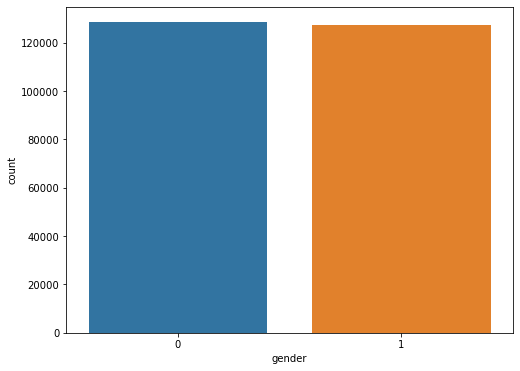

In [75]:
# figure to display gender column

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(covid["gender"]);

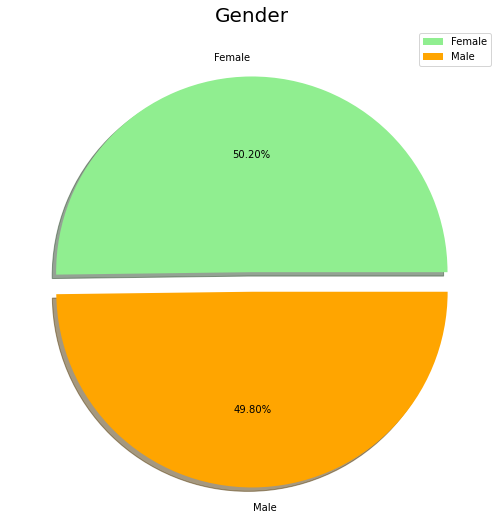

In [15]:
# pie chart to display gender column

labels = ['Female', 'Male']
size = covid['gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [16]:
# check corona_result column

covid['corona_result'].value_counts()

negative    242351
positive     13560
other         3374
Name: corona_result, dtype: int64

In [17]:
# drop data with corona_result as other.

covid.drop(covid.index[covid['corona_result'] == 'other'], inplace = True)
covid['corona_result'].value_counts()

negative    242351
positive     13560
Name: corona_result, dtype: int64

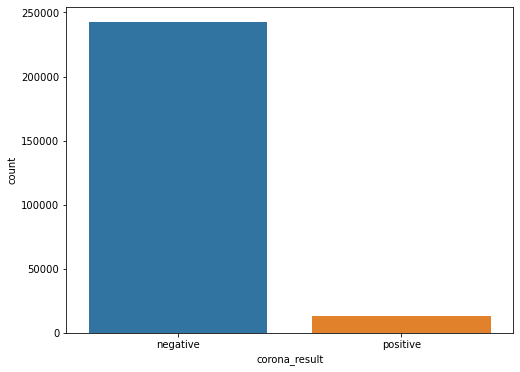

In [18]:
# figures to display corona_result column

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(covid["corona_result"]);

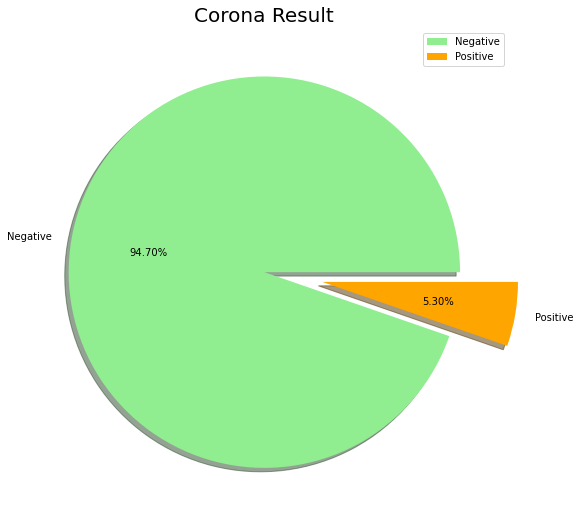

In [19]:
# pie chart for corona_result column

labels = ['Negative', 'Positive']
size = covid['corona_result'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.3]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Corona Result', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [20]:
#check cough column

covid['cough'].value_counts()

0       111626
0       104990
1        23265
1        15789
None       241
Name: cough, dtype: int64

As we can  see, some records are filled in as 'None'. 

Let us assume that this meant that the patients had no cough symptoms, thus change the attribute from None to 0.

In [21]:
#  Change none to 0

covid['cough'] = covid['cough'].map({'0': 0, '1': 1, 'None': 0})

# display changes
covid['cough'].value_counts()

0.0    105231
1.0     23265
Name: cough, dtype: int64

In [22]:
#check fever column

covid['fever'].value_counts()

0       119523
0       116291
1        11963
1         7892
None       242
Name: fever, dtype: int64

In the fever column, we see the same case as in the cough column. Therefore, we shall follow the same steps as before.

In [23]:
#  Change none to 0

covid['fever'] = covid['fever'].map({'0': 0, '1': 1, 'None': 0})

# display changes
covid['fever'].value_counts()

0.0    116533
1.0     11963
Name: fever, dtype: int64

In [26]:
# check sore_throat column

covid['sore_throat'].value_counts()

0    251559
0      2854
1      1455
1        43
Name: sore_throat, dtype: int64

In [25]:
# check shortness_of_breath column

covid['shortness_of_breath'].value_counts()

0    251968
0      2863
1      1046
1        34
Name: shortness_of_breath, dtype: int64

In [27]:
# check headache column

covid['head_ache'].value_counts()

0    250974
0      2829
1      2040
1        68
Name: head_ache, dtype: int64

In [28]:
# check age_60_and_above column

covid['age_60_and_above'].value_counts()

None    119374
No      112788
Yes      23749
Name: age_60_and_above, dtype: int64

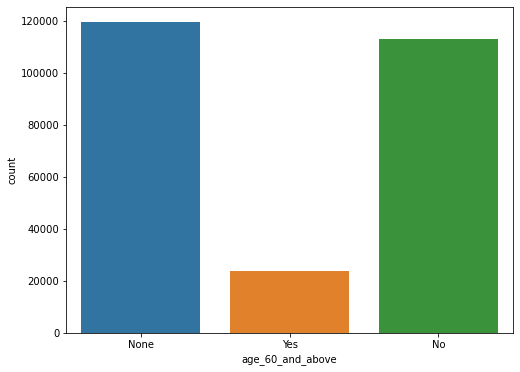

In [29]:
# figure to display age_60_and_above column

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(covid["age_60_and_above"]);

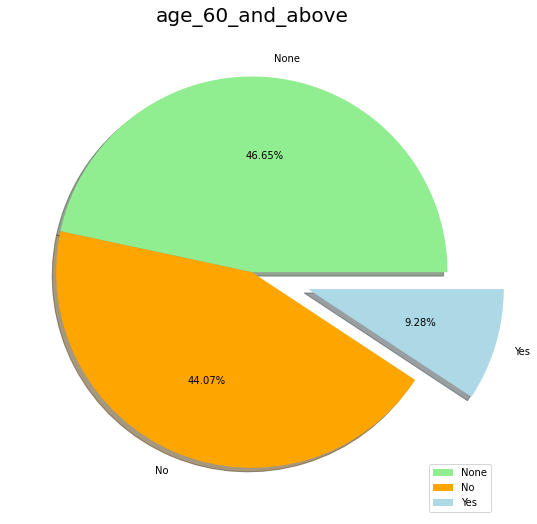

In [30]:
# pie chart for age indication

labels = ['None', 'No', 'Yes']
size = covid['age_60_and_above'].value_counts()
colors = ['lightgreen', 'orange', 'lightblue']
explode = [0, 0, 0.3]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('age_60_and_above', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [31]:
# check test indication column
covid['test_indication'].value_counts()

Other                     222998
Abroad                     23312
Contact with confirmed      9601
Name: test_indication, dtype: int64

In [32]:
#  Change other and abroad to 0, Contact with confirmed to 1
covid['test_indication'] = covid['test_indication'].map({'Other': 0, 'Abroad': 0, 'Contact with confirmed': 1})

# Processing data for model development

Make gender column numerical

male : 1 , female : 0

In [33]:
covid['gender'] = covid['gender'].map({'male': 1, 'female': 0})

covid['gender'].value_counts()

0    128541
1    127370
Name: gender, dtype: int64

In [34]:
#make corona_result column numerical
# positive : 1 , negative : 0
covid['corona_result'] = covid['corona_result'].map({'positive': 1, 'negative': 0})

covid['corona_result'].value_counts()

0    242351
1     13560
Name: corona_result, dtype: int64

In [35]:
# check dataset datatypes

covid.dtypes

test_date               object
cough                  float64
fever                  float64
sore_throat             object
shortness_of_breath     object
head_ache               object
corona_result            int64
age_60_and_above        object
gender                   int64
test_indication          int64
dtype: object

In [52]:
## Replacing NAN values with the respective column's mean value 
mean_value=covid['cough'].mean()
covid['cough'].fillna(value=mean_value,inplace=True)
covid['cough']

0         0.181056
1         0.181056
2         0.181056
3         0.181056
4         0.181056
            ...   
265116    1.000000
265117    1.000000
265118    1.000000
265119    1.000000
265120    1.000000
Name: cough, Length: 255911, dtype: float64

In [53]:
mean_value=covid['fever'].mean()
covid['fever'].fillna(value=mean_value,inplace=True)
covid['fever']


0         0.0931
1         0.0931
2         0.0931
3         0.0931
4         0.0931
           ...  
265116    1.0000
265117    1.0000
265118    0.0000
265119    0.0000
265120    0.0000
Name: fever, Length: 255911, dtype: float64

In [54]:
# change columns that will be used for training the model to int datatype
covid = covid.astype({"cough": int, "fever": int, "sore_throat": int, "shortness_of_breath": int, "head_ache": int, "test_indication": int})

In [55]:
# check dataset datatypes

covid.dtypes

test_date              object
cough                   int32
fever                   int32
sore_throat             int32
shortness_of_breath     int32
head_ache               int32
corona_result           int64
age_60_and_above       object
gender                  int64
test_indication         int32
dtype: object

In [56]:
covid.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,0,None,0,0
1,2020-04-30,0,0,0,0,0,0,None,0,0
2,2020-04-30,0,0,0,0,0,0,None,1,0
3,2020-04-30,0,0,0,0,0,0,None,0,0
4,2020-04-30,0,0,0,0,0,0,None,1,0


# Splitting the data into training and test datasets

Here, we are trying to predict whether the patient has a corona or not using the given data.

Hence, the corona_result will be the y label and rest of the data (excluding date, test indication and age) will be the X or the input data.

In [77]:
# x data
x = covid.drop(labels = ["test_date", "corona_result", "age_60_and_above",'test_indication'], axis=1)
x.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,gender
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,0
4,0,0,0,0,0,1


In [58]:
# y data
y = covid["corona_result"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: corona_result, dtype: int64

# Splitting the data into X train, X test and y train, y test

The test_size=0.2 implies that 80% of the sample will be used to train the model, and 20% will be used to test the model's accuracy.

The random_state is set so that the results are reproducible, that is every time we run the code, the same instances will be included in the training and testing sets respectively.

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [60]:
# here we can see the number of columns in the input data

len(X_train), len(X_test)

(204728, 51183)

# Training the models

# Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [62]:
# Here, we fit the model on the input data and test data for training purposes

rf.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
# Then, we use the 20% of sample data for testing to measure the accuracy of the model

RandomForestClassifierScore = rf.score(X_test,y_test)
print("Accuracy obtained by RandomForestClassifier model:", RandomForestClassifierScore*100)

Accuracy obtained by RandomForestClassifier model: 97.0204950862591


### Making a Predictive System
### Saving the trained model

In [67]:
import pickle

In [69]:
filename = 'covid_19.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [70]:
# loading the saved model
loaded_model = pickle.load(open('covid_19.pkl', 'rb'))

In [78]:
for column in x.columns:
  print(column)

cough
fever
sore_throat
shortness_of_breath
head_ache
gender
